# Price Competition - Airlines
Consider two companies competing on price. The goods (or services) the companies are providing are completely homogenous - they are completely identical. A good example of such a market is the market for economy airline tickets. Most consumers purchasing economy airline tickets is only interested in getting from A to B, and usually have no loyalty or preference in the choice of airline. As a consequence, we assume that the consumer will purchase whichever airline ticket is cheapest. This would typically lead to very low, if any, profit margins for airlines.

## Demand Function Construction
Consider a world where everything that exitst are two airlines and 500 consumers. Each of the airlines have one airplane with 100 passenger seats each. Every consumers has some wealth, and since the only thing they can do in this world is to buy airline tickets they will if they can afford one. 

In [8]:
# Importing packages
import numpy as np
from matplotlib import pyplot as plt

# Variables
N = 500
max_price = 100
min_price = 20

# Assigning random consumer bid prices
consumer_bids = np.random.uniform(max_price, min_price, N)

Now we have the size of the airplanes and some bidding prices for all consumers in the market. Before we can look at how the market clears, we should study the demand function. The demand is simply the number of  airline tickets that will be sold at a given price. So any consumer facing a market price below or equal to their preferred price will buy a ticket.

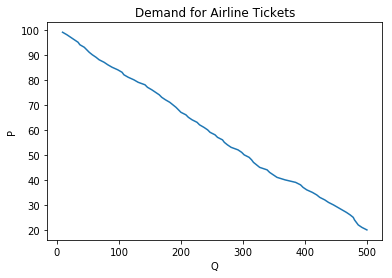

In [9]:
#Constructing demand function
demand = np.zeros(max_price - min_price)

i = 0
for price in range(min_price, max_price):

    demand[i] = sum(price <= bid for bid in consumer_bids)
    i += 1

# Plotting the demand curve
plt.plot(demand, range(min_price, max_price))
plt.xlabel("Q")
plt.ylabel("P")
plt.title("Demand for Airline Tickets")
plt.show()

We see that we get a fairly straight line, which is due to the uniformly distributed prices. Moreover, demand is falling as price increases, which is reasonable.

Now that we have the demand for airline seats, it is ut to the two airlines to set their prices. 

In [47]:
# Seats in both airlines
seats_in_flight = 100
airline_1_seats = seats_in_flight
airline_2_seats = seats_in_flight
total_seats = airline_1_seats + airline_2_seats

# Fixed cost of one fligt
flight_cost = 65000

# Function that determines the revenue and no of filled seats
def sell_tickets(airline_1_price, airline_2_price):
    
    global airline_1_seats
    global airline_2_seats
    global total_seats
    
    for bid in consumer_bids:
    
        #print(airline_1_seats, airline_2_seats)
    
        # Will stop searching for available seats if there are none.
        if (total_seats <= 0):
            break
        
        # Both airlines have empty seats
        if (airline_1_seats > 0 and airline_2_seats > 0):
        
            # Airline 1 is cheapest
            if (airline_1_price <= airline_2_price):
                if (bid >= airline_1_price):
                    airline_1_seats -= 1
                    total_seats -= 1
            # Airline 2 is cheapest
            else:
                if (bid >= airline_2_price):
                    airline_2_seats -= 1
                    total_seats -=1
    
        # Only airline 1 has empty seats
        elif (airline_1_seats > 0 and airline_2_seats == 0):
        
            if (bid >= airline_1_price):
                airline_1_seats -= 1
                total_seats -= 1
    
        # Only airline 2 has empty seats
        elif (airline_2_seats > 0 and airline_1_seats == 0):
        
            if (bid >= airline_2_price):
                airline_2_seats -= 1
                total_seats -=1       

def print_info():
    
    global price_1
    global price_2
    
    revenue_1 = (seats_in_flight - airline_1_seats)*price_1
    revenue_2 = (seats_in_flight - airline_2_seats)*price_2

    print("{:12s} {:8s} {:8s}" .format("", "Airline 1", "Airline 2"))
    print("{:12s} {:8d} {:8d}" .format("Ticket Price", price_1, price_2))
    print("{:12s} {:8d} {:8d}" .format("Empty seats", airline_1_seats, airline_2_seats))
    print("{:12s} {:8d} {:8d}" .format("Revenue",  revenue_1, revenue_2))
    
price_1 = 75
price_2 = 80
sell_tickets(price_1, price_2)
print_info()

# Here something goes wrong.
price_1 = 99
price_2 = 80
sell_tickets(price_1, price_2)
print_info()

             Airline 1 Airline 2
Ticket Price       75       80
Empty seats         0       55
Revenue          7500     3600
             Airline 1 Airline 2
Ticket Price       99       80
Empty seats         0        0
Revenue          9900     8000
